На локальный компьютер устанавливать в venv

In [2]:
!pip install h2o

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 5.1 MB/s eta 0:00:00


In [27]:
import h2o

from h2o.automl import H2OAutoML # загрузка модели

In [28]:
H2OAutoML?

In [29]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 16 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_unknownUser_61qci5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.049 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


# Бинарная классификация

In [30]:
import os
data_path = "https://github.com/h2oai/h2o-tutorials/raw/master/h2o-world-2017/automl/data/product_backorders.csv"

# Загрузка в H2O H2O
df = h2o.import_file(data_path)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [32]:
type(df)

h2o.frame.H2OFrame

In [35]:
df.describe()

Rows:19053
Cols:23

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
type,int,int,int,int,int,int,int,int,int,int,int,int,enum,int,real,real,int,enum,enum,enum,enum,enum,enum
mins,1111620.0,-1440.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,-99.0,-99.0,0.0,,,,,,
mean,2059552.76056264,376.36702881436014,7.706036161335188,48.272345562378625,182.91082769117727,344.739830997743,497.79242114102766,56.11887891670605,168.53445651603428,333.53219965359773,504.2553928515193,48.84070750013117,,2.3114995013908572,-6.519833622001783,-6.05393533826694,0.8917755734005144,,,,,,
maxs,3284775.0,730722.0,52.0,170920.0,479808.0,967776.0,1418208.0,186451.0,550609.0,1136154.0,1759152.0,85584.0,,13824.0,1.0,1.0,1440.0,,,,,,
sigma,663337.6456498688,7002.071628662688,6.778665072124189,1465.9992102068293,4304.865591970626,8406.062155159243,12180.570042918358,1544.2177775482573,4581.340080221506,9294.566153218986,14184.14539565363,968.7738680675265,,110.24106014611986,25.975138766871876,25.184497150032527,23.033345417338797,,,,,,
zeros,0,1858,121,15432,12118,11136,10604,10278,8022,6864,6231,9909,,18601,474,401,18585,,,,,,
missing,0,0,1078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1113121.0,0.0,8.0,1.0,6.0,6.0,6.0,0.0,4.0,9.0,12.0,0.0,No,1.0,0.9,0.89,0.0,No,No,No,Yes,No,Yes
1,1113268.0,0.0,8.0,0.0,2.0,3.0,4.0,1.0,2.0,3.0,3.0,0.0,No,0.0,0.96,0.97,0.0,No,No,No,Yes,No,Yes
2,1113874.0,20.0,2.0,0.0,45.0,99.0,153.0,16.0,42.0,80.0,111.0,10.0,No,0.0,0.81,0.88,0.0,No,No,No,Yes,No,Yes


Мы заметим, что столбец ответа ""went_on_backorder"" уже закодирован как "enum", поэтому нам ничего не нужно здесь делать.  Если бы он был закодирован как 0/1 "int", то нам пришлось бы преобразовать столбец следующим образом: `df[y] = df[y].как factor()`


Далее, давайте определим столбцы ответа и предиктора, сохранив их как "x" и `y`.  Столбец "sku" является уникальным идентификатором, поэтому мы захотим удалить его из набора наших предикторов.

In [6]:
y = "went_on_backorder"
x = df.columns
x.remove(y)
x.remove("sku")

## Запустить AutoML

Запустить AutoML, остановившись после 10 моделей.  Аргумент `max_models` указывает количество отдельных (или "базовых") моделей и не включает две модели ансамбля, которые обучаются в конце.

In [36]:
H2OAutoML?

In [7]:
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y, training_frame = df)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),9/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),2/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


*Примечание: Если вы видите следующую ошибку, это означает, что вам необходимо установить модуль pandas.*
```
H2OTypeError: Argument `python_obj` should be a None | list | tuple | dict | numpy.ndarray | pandas.DataFrame | scipy.sparse.issparse, got H2OTwoDimTable
``

## Таблица лидеров

Далее мы рассмотрим таблицу лидеров AutoML.  Поскольку мы не указали `leaderboard_frame` в методе `H2OAutoML.train()` для оценки и ранжирования моделей, таблица лидеров AutoML использует показатели перекрестной проверки для ранжирования моделей.  

Показатель производительности по умолчанию для каждой задачи машинного обучения (бинарная классификация, мультиклассовая классификация, регрессия) задается внутри системы, и таблица лидеров будет отсортирована по этому показателю.  В случае бинарной классификации показателем ранжирования по умолчанию является площадь под кривой ROC (AUC).  В будущем пользователь сможет указать любую из метрик H2O, чтобы можно было использовать различные метрики для формирования рейтинга в таблице лидеров.

Модель лидера хранится в "aml.leader", а таблица лидеров - в "aml.leaderboard`.

In [37]:
lb = aml.leaderboard
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_4_AutoML_2_20250404_151943,3.32697,11.0687,2.35344,0.00732742,11.0687
XGBoost_1_AutoML_2_20250404_151943,3.40438,11.5898,2.41298,0.00749811,11.5898
GBM_2_AutoML_2_20250404_151943,3.43547,11.8025,2.47221,0.00755929,11.8025
GBM_3_AutoML_2_20250404_151943,3.53656,12.5072,2.54,0.0077827,12.5072
GBM_1_AutoML_2_20250404_151943,3.62094,13.1112,2.5901,0.00796505,13.1112
DRF_1_AutoML_2_20250404_151943,3.63485,13.2122,2.60165,0.00800825,13.2122
XGBoost_2_AutoML_2_20250404_151943,3.7081,13.75,2.74383,0.00815454,13.75
XRT_1_AutoML_2_20250404_151943,4.03256,16.2616,2.88119,0.00888854,16.2616
XGBoost_3_AutoML_2_20250404_151943,4.40967,19.4452,3.3783,0.00967623,19.4452
GBM_5_AutoML_2_20250404_151943,4.55061,20.7081,3.5662,0.00997446,20.7081


Теперь мы посмотрим на снимки лучших моделей.  Здесь мы должны увидеть два составных ансамбля, которые находятся в верхней части таблицы лидеров или около нее.  Составные ансамбли почти всегда могут превзойти одну модель.

In [38]:
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_4_AutoML_2_20250404_151943,3.32697,11.0687,2.35344,0.00732742,11.0687
XGBoost_1_AutoML_2_20250404_151943,3.40438,11.5898,2.41298,0.00749811,11.5898
GBM_2_AutoML_2_20250404_151943,3.43547,11.8025,2.47221,0.00755929,11.8025
GBM_3_AutoML_2_20250404_151943,3.53656,12.5072,2.54,0.0077827,12.5072
GBM_1_AutoML_2_20250404_151943,3.62094,13.1112,2.5901,0.00796505,13.1112
DRF_1_AutoML_2_20250404_151943,3.63485,13.2122,2.60165,0.00800825,13.2122
XGBoost_2_AutoML_2_20250404_151943,3.7081,13.75,2.74383,0.00815454,13.75
XRT_1_AutoML_2_20250404_151943,4.03256,16.2616,2.88119,0.00888854,16.2616
XGBoost_3_AutoML_2_20250404_151943,4.40967,19.4452,3.3783,0.00967623,19.4452
GBM_5_AutoML_2_20250404_151943,4.55061,20.7081,3.5662,0.00997446,20.7081


Чтобы просмотреть всю таблицу лидеров, укажите в аргументе `rows` метода `head()` общее количество строк:

In [10]:
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_1_20250404_150917,0.952117,0.168482,0.75275,0.148466,0.223284,0.0498558
StackedEnsemble_BestOfFamily_1_AutoML_1_20250404_150917,0.951617,0.169054,0.75346,0.146158,0.223427,0.0499195
GBM_4_AutoML_1_20250404_150917,0.948606,0.173961,0.736134,0.158272,0.226527,0.0513145
GBM_1_AutoML_1_20250404_150917,0.946855,0.175838,0.736281,0.161556,0.228859,0.0523764
XGBoost_3_AutoML_1_20250404_150917,0.946033,0.176087,0.740673,0.155436,0.228001,0.0519846
GBM_3_AutoML_1_20250404_150917,0.946027,0.177371,0.732411,0.177962,0.228546,0.0522332
XGBoost_2_AutoML_1_20250404_150917,0.944847,0.182011,0.723623,0.166718,0.231072,0.0533942
GBM_2_AutoML_1_20250404_150917,0.944749,0.179901,0.725531,0.164282,0.230201,0.0529923
XGBoost_1_AutoML_1_20250404_150917,0.942697,0.18251,0.718273,0.160809,0.231157,0.0534336
XRT_1_AutoML_1_20250404_150917,0.942144,0.21219,0.726515,0.159676,0.24522,0.060133


## Исследование ансамбля

Чтобы понять, как работает ансамбль, давайте заглянем внутрь модели Stacked Ensemble "Все модели".  Ансамбль "Все модели" - это совокупность всех отдельных моделей в автозапуске.  Это часто самая эффективная модель в таблице лидеров.

In [11]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = se.metalearner()

/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Изучите переменную важность алгоритма метаобучения (объединения) в ансамбле.  Это показывает нам, какой вклад вносит каждый базовый обучающийся в ансамбль. В наборных ансамблях AutoML используется алгоритм metalearner по умолчанию (GLM с неотрицательными весами), поэтому переменная важности metalearner на самом деле является стандартизированными значениями коэффициентов GLM.

In [12]:
metalearner.coef_norm()

{'Intercept': -3.743651024959182,
 'GBM_4_AutoML_1_20250404_150917': 0.6128464601793085,
 'GBM_1_AutoML_1_20250404_150917': 0.2600550207873572,
 'XGBoost_3_AutoML_1_20250404_150917': 0.4704439326395286,
 'GBM_3_AutoML_1_20250404_150917': 0.01481048178850701,
 'XGBoost_2_AutoML_1_20250404_150917': 0.3928451435574786,
 'GBM_2_AutoML_1_20250404_150917': 0.0,
 'XGBoost_1_AutoML_1_20250404_150917': 0.09978450593180263,
 'XRT_1_AutoML_1_20250404_150917': 0.4329024589583707,
 'DRF_1_AutoML_1_20250404_150917': 0.19185275475206767,
 'GLM_1_AutoML_1_20250404_150917': 0.007497315012937694}

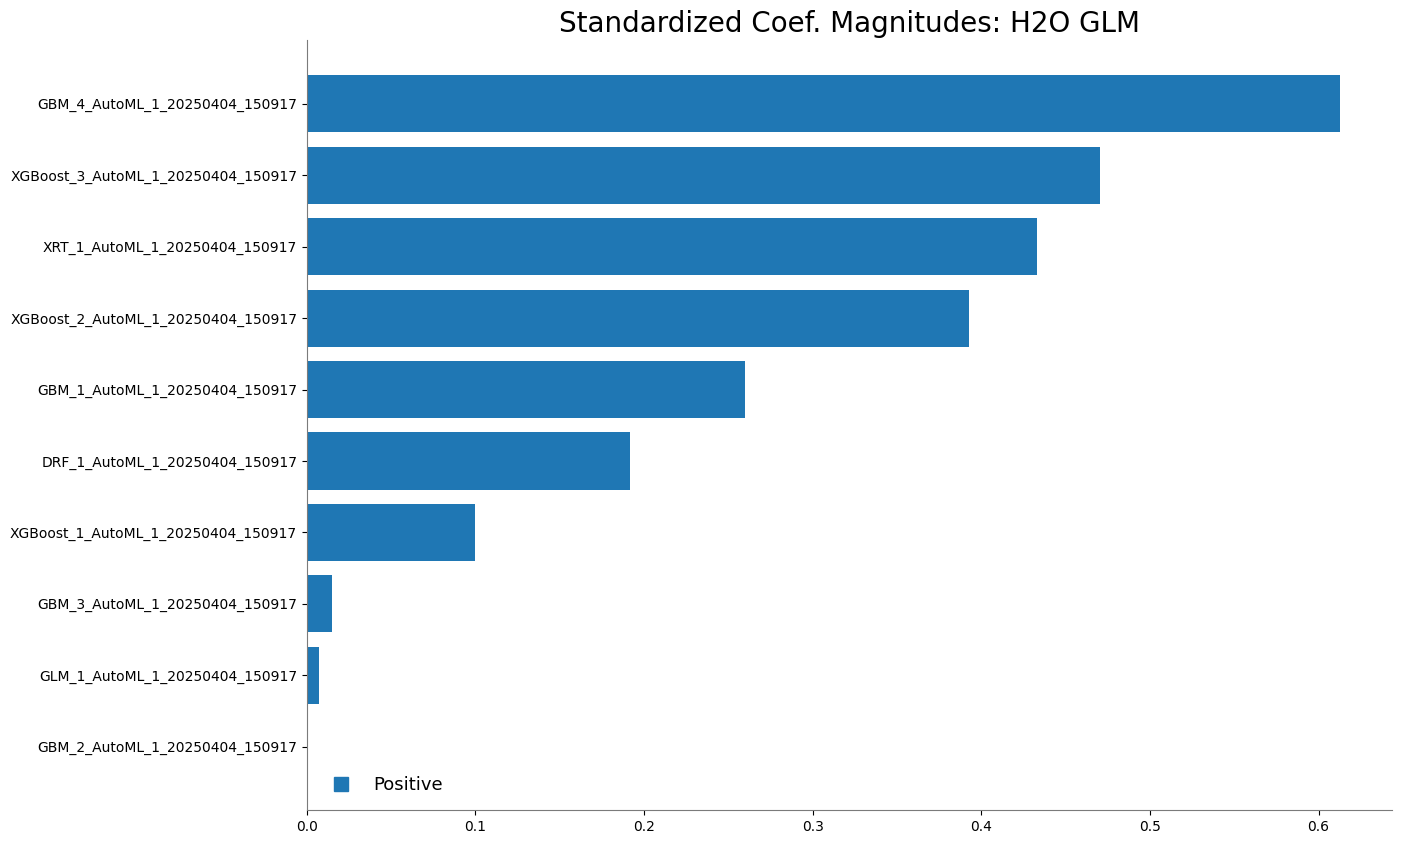

In [13]:
%matplotlib inline
metalearner.std_coef_plot()

# Подбор гиперпараметров отдельно для модели

In [39]:
from h2o.estimators import H2ORandomForestEstimator

In [40]:
from h2o.grid import H2OGridSearch

In [41]:
# Создаем модель
rf = H2ORandomForestEstimator()

# Определяем пространство поиска
hyperparams = {
    "ntrees": [50, 100, 200],
    "max_depth": [5, 10, 15],
    "sample_rate": [0.5, 0.75, 1.0],
    "col_sample_rate": [0.5, 0.75, 1.0]
}

In [ ]:
# Создаем сетку поиска
grid = H2OGridSearch(model=rf, hyperparams=hyperparams)

# Запускаем поиск
grid.train(x=x, y=y, training_frame=df)


In [ ]:
# Получаем лучшую модель
best_model = grid.get_hyperparams()[0]

## Сохранить модель

Существует два способа сохранить модель лидера - в двоичном формате и в формате MOJO.  Если вы собираетесь использовать свою модель лидера в рабочей среде, мы бы рекомендовали формат MOJO, поскольку он оптимизирован для использования в производственной среде.

In [44]:
type(aml.leader)

h2o.estimators.gbm.H2OGradientBoostingEstimator

In [42]:
h2o.save_model(aml.leader, path = "./product_backorders_model_bin")

'/content/product_backorders_model_bin/GBM_4_AutoML_2_20250404_151943'

In [ ]:
# экспортировать MOJO файл

In [15]:
aml.leader.download_mojo(path = "./")

'/content/StackedEnsemble_AllModels_1_AutoML_1_20250404_150917.zip'

# Регрессия

In [16]:
data_path = "https://github.com/h2oai/h2o-tutorials/raw/master/h2o-world-2017/automl/data/powerplant_output.csv"

# Load data into H2O
df = h2o.import_file(data_path)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [17]:
df.describe()

Rows:9568
Cols:5

,TemperatureCelcius,ExhaustVacuumHg,AmbientPressureMillibar,RelativeHumidity,HourlyEnergyOutputMW
type,real,real,real,real,real
mins,1.81,25.36,992.89,25.56,420.26
mean,19.651231187290957,54.3058037207358,1013.2590781772578,73.30897784280936,454.36500940635455
maxs,37.11,81.56,1033.3,100.16,495.76
sigma,7.452473229611082,12.707892998326807,5.93878370581162,14.600268756728957,17.066994999803423
zeros,0,0,0,0,0
missing,0,0,0,0,0
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.4,1012.16,92.14,488.56


Далее давайте определим столбец ответа и сохраним имя столбца как "y".  В этом наборе данных мы будем использовать все столбцы, кроме ответа, в качестве предикторов, поэтому мы можем не указывать аргумент "x" явно.

In [18]:
y = "HourlyEnergyOutputMW"

Разделим данные на два фрейма: `тренировочный` (80%) и `тестовый` (20%).  Фрейм "тест" будет использоваться для определения рейтинга в таблице лидеров и демонстрации того, как генерировать прогнозы с использованием модели автоматического лидерства.

In [19]:
splits = df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

## Запуск AutoML

Запуск AutoML с остановкой через 60 секунд.  Аргумент `max_runtime_secs` позволяет ограничить время запуска AutoML.  При использовании критерия остановки с ограничением по времени количество моделей, загружаемых в поезд, будет варьироваться в зависимости от запуска.  Если используется различное оборудование или даже если используется одна и та же машина, но доступные вычислительные ресурсы на этой машине различаются между запусками, то AutoML может обучать большее количество моделей при одном запуске по сравнению с другим.

Здесь фрейм `test` явно передается в аргумент `leaderboard_frame`, что означает, что вместо использования метрик с перекрестной проверкой мы используем метрики тестового набора для создания таблицы лидеров.

In [20]:
aml = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "powerplant_lb_frame")
aml.train(y = y, training_frame = train, leaderboard_frame = test)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_4_AutoML_2_20250404_151943


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    55                 55                          164701                 10           10           10            101           354           234.109

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 5.077648456558518
RMSE: 2.2533638091880586
MAE: 1.6257170497928572
RMSLE: 0.004966017238669992
Mean Residual Deviance: 5.077648456558518

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 11.525434471137762
RMSE: 3.394913028508648
MAE: 2.472709184283467
RMSLE: 0.0074453116634809035
Mean Residual Deviance: 11.525434471137762

Cross-Validation Metrics Summary: 
                        mean        sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ----------  -----------  ------------  ------------  ------------  ------------  ------------
aic                     nan         0            nan           nan           nan           nan           nan
loglikelihood           nan         0            nan           nan           nan           nan           nan
mae                     2.4727      0.0394375    2.51752       2.46866       2.50837       2.43594       2.43304
mean_residual_deviance  11.5254     0.904202     12.5602       10.4884       11.703        12.1717       10.7038
mse                     11.5254     0.904202     12.5602       10.4884       11.703        12.1717       10.7038
r2                      0.960356    0.00312279   0.956839      0.964482      0.959495      0.958379      0.962584
residual_deviance       11.5254     0.904202     12.5602       10.4884       11.703        12.1717       10.7038
rmse                    3.39281     0.133544     3.54404       3.23859       3.42097       3.4888        3.27167
rmsle                   0.00744137  0.000271012  0.00774588    0.00711981    0.00748008    0.00764953    0.00721152

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2025-04-04 15:20:34  3.809 sec   0                  17.0586          14.8343         290.995
    2025-04-04 15:20:35  3.874 sec   5                  10.4833          8.97547         109.899
    2025-04-04 15:20:35  3.939 sec   10                 6.75002          5.6269          45.5628
    2025-04-04 15:20:35  4.000 sec   15                 4.68547          3.7894          21.9536
    2025-04-04 15:20:35  4.061 sec   20                 3.58794          2.82218         12.8733
    2025-04-04 15:20:35  4.122 sec   25                 3.06967          2.35407         9.4229
    2025-04-04 15:20:35  4.177 sec   30                 2.78855          2.09263         7.77599
    2025-04-04 15:20:35  4.231 sec   35                 2.61194          1.93079         6.82222
    2025-04-04 15:20:35  4.285 sec   40                 2.48454          1.81682         6.17294
    2025-04-04 15:20:35  4.343 sec   45                 2.37928          1.72865         5.66098
    2025-04-04 15:20:35  4.403 sec   50                 2.30244          1.66606         5.30123
    2025-04-04 15:20:35  4.456 sec   55                 2.25336          1.62572         5.07765

Variable Importances: 
variable                 relative_importance    scaled_importance    percentage
-----------------------  ---------------------  -------------------  ------------
TemperatureCelcius       6.70234e+06            1                    0.622037
ExhaustVacuumHg          3.04312e+

*Примечание: Если вы видите следующую ошибку, это означает, что вам необходимо установить модуль pandas.*
```
H2OTypeError: Argument `python_obj` should be a None | list | tuple | dict | numpy.ndarray | pandas.DataFrame | scipy.sparse.issparse, got H2OTwoDimTable
``

В демонстрационных целях мы также выполним второй запуск AutoML, на этот раз предоставив исходный полный набор данных `df` (без передачи `leaderboard_frame`).  Это более эффективное использование наших данных, поскольку мы можем использовать 100% данных для обучения, а не 80%, как мы делали выше.  На этот раз в нашей таблице лидеров будут использоваться показатели с перекрестной проверкой.

*Примечание: Использование явного параметра "leaderboard_frame" для подсчета очков может быть полезно в некоторых случаях, именно поэтому эта опция доступна.*

In [21]:
aml2 = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "powerplant_full_data")
aml2.train(y = y, training_frame = df)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_3_20250404_152044


Model Summary: 
    number_of_trees
--  -----------------
    56

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 2.876830228279757
RMSE: 1.6961221147900163
MAE: 1.196042430839411
RMSLE: 0.003746031373199556
Mean Residual Deviance: 2.876830228279757

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 10.740721259510746
RMSE: 3.277303962025913
MAE: 2.3576793319804215
RMSLE: 0.0072069232010301765
Mean Residual Deviance: 10.740721259510746

Cross-Validation Metrics Summary: 
                        mean        sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ----------  -----------  ------------  ------------  ------------  ------------  ------------
aic                     nan         0            nan           nan           nan           nan           nan
loglikelihood           nan         0            nan           nan           nan           nan           nan
mae                     2.35768     0.0622309    2.32008       2.28526       2.43632       2.4062        2.34055
mean_residual_deviance  10.7408     1.18366      9.89019       9.31525       11.953        11.9104       10.6353
mse                     10.7408     1.18366      9.89019       9.31525       11.953        11.9104       10.6353
r2                      0.963076    0.00438822   0.965982      0.967928      0.958599      0.958304      0.964566
residual_deviance       10.7408     1.18366      9.89019       9.31525       11.953        11.9104       10.6353
rmse                    3.27332     0.181014     3.14487       3.05209       3.4573        3.45115       3.26118
rmsle                   0.00719849  0.000390597  0.00693459    0.00671239    0.00759381    0.00758215    0.00716949

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2025-04-04 15:20:58  14.000 sec  0                  454.186          453.865         206285
    2025-04-04 15:20:59  14.808 sec  5                  76.6197          76.3397         5870.58
    2025-04-04 15:21:00  15.085 sec  10                 13.7082          12.9469         187.914
    2025-04-04 15:21:00  15.155 sec  15                 4.01165          3.13592         16.0934
    2025-04-04 15:21:00  15.237 sec  20                 2.7844           2.02225         7.7529
    2025-04-04 15:21:00  15.328 sec  25                 2.51452          1.7907          6.3228
    2025-04-04 15:21:00  15.425 sec  30                 2.31084          1.63937         5.34
    2025-04-04 15:21:00  15.530 sec  35                 2.14432          1.51412         4.59813
    2025-04-04 15:21:00  15.641 sec  40                 1.9967           1.40658         3.98682
    2025-04-04 15:21:00  15.756 sec  45                 1.88893          1.32895         3.56805
    2025-04-04 15:21:00  15.904 sec  50                 1.80348          1.26431         3.25252
    2025-04-04 15:21:00  16.030 sec  55                 1.70902          1.20187         2.92075
    2025-04-04 15:21:01  16.106 sec  56                 1.69612          1.19604         2.87683

Variable Importances: 
variable                 relative_importance    scaled_importance    percentage
-----------------------  ---------------------  -------------------  ------------
TemperatureCelcius       1.44105e+06            1                    0.542715
ExhaustVacuumHg          1.01969e+06            0.7076               0.384026
AmbientPressureMillibar  141001                 0.097846             0.0531025
RelativeHumidity         53521.4                0.0371405            0.0201567

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

## Таблица лидеров

Далее мы рассмотрим таблицу лидеров AutoML.  Поскольку мы указали `leaderboard_frame` в методе `H2OAutoML.train()` для оценки и ранжирования моделей, таблица лидеров AutoML использует производительность по этим данным для ранжирования моделей.

После просмотра таблицы лидеров проекта "powerplant_lb_frame" AutoML, мы сравниваем ее с таблицей лидеров проекта `powerplant_full_data".  Мы видим, что результаты становятся лучше, когда для обучения используется полный набор данных.  

Метрика производительности по умолчанию для каждой задачи машинного обучения (бинарная классификация, мультиклассовая классификация, регрессия) задается внутри системы, и таблица лидеров будет отсортирована по этой метрике.  В случае регрессии метрикой ранжирования по умолчанию является среднее остаточное отклонение.  В будущем пользователь сможет указать любую из метрик H2O, чтобы можно было использовать различные показатели для формирования рейтинга в таблице лидеров.

In [22]:
aml.leaderboard.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_4_AutoML_2_20250404_151943,3.32697,11.0687,2.35344,0.00732742,11.0687
XGBoost_1_AutoML_2_20250404_151943,3.40438,11.5898,2.41298,0.00749811,11.5898
GBM_2_AutoML_2_20250404_151943,3.43547,11.8025,2.47221,0.00755929,11.8025
GBM_3_AutoML_2_20250404_151943,3.53656,12.5072,2.54,0.0077827,12.5072
GBM_1_AutoML_2_20250404_151943,3.62094,13.1112,2.5901,0.00796505,13.1112
DRF_1_AutoML_2_20250404_151943,3.63485,13.2122,2.60165,0.00800825,13.2122
XGBoost_2_AutoML_2_20250404_151943,3.7081,13.75,2.74383,0.00815454,13.75
XRT_1_AutoML_2_20250404_151943,4.03256,16.2616,2.88119,0.00888854,16.2616
XGBoost_3_AutoML_2_20250404_151943,4.40967,19.4452,3.3783,0.00967623,19.4452
GBM_5_AutoML_2_20250404_151943,4.55061,20.7081,3.5662,0.00997446,20.7081


In [23]:
aml2.leaderboard.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
XGBoost_1_AutoML_3_20250404_152044,3.2773,10.7407,2.35768,0.00720692,10.7407
GBM_3_AutoML_3_20250404_152044,3.44975,11.9007,2.53453,0.00757498,11.9007
XGBoost_2_AutoML_3_20250404_152044,3.45678,11.9493,2.52543,0.00759526,11.9493
GBM_2_AutoML_3_20250404_152044,3.46371,11.9973,2.55386,0.00760463,11.9973
GBM_1_AutoML_3_20250404_152044,3.5362,12.5047,2.60183,0.00776071,12.5047
DRF_1_AutoML_3_20250404_152044,3.70016,13.6912,2.68449,0.00813056,13.6912
GBM_4_AutoML_3_20250404_152044,4.10523,16.8529,3.14135,0.00899126,16.8529
XRT_1_AutoML_3_20250404_152044,4.24689,18.0361,3.06468,0.00930663,18.0361
DeepLearning_1_AutoML_3_20250404_152044,4.32679,18.7211,3.34676,0.00949862,18.7211
GLM_1_AutoML_3_20250404_152044,4.56078,20.8007,3.63002,0.0100388,20.8007


Этот набор данных взят из [Хранилища данных машинного обучения UCI] (http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant).  Данные были использованы в [публикации] (https://www.sciencedirect.com/science/article/pii/S0142061514000908) в *Международном журнале электроэнергетики и энергетических систем* за 2014 год.  В своей работе авторы достигли средней абсолютной погрешности (MAE) в 2,818 и среднеквадратичной ошибки (RMSE) в 3,787 для своей лучшей модели.  Итак, с помощью AutoML от H2O мы уже превзошли все достижения техники всего за 60 секунд вычислительного времени!

## Прогнозирование с использованием модели Leader

Если вам нужно сгенерировать прогнозы для набора тестов, вы можете сделать прогнозы непосредственно для объекта "H2OAutoML" или для объекта leader model.

In [24]:
pred = aml.predict(test)
pred.head()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict
486.703
473.48
466.058
452.602
448.865
469.053
441.872
464.229
442.863
432.633


При необходимости стандартный метод `model_performance()` может быть применен к модели Auto leader и тестовому набору для создания объекта производительности модели H2O.

In [25]:
perf = aml.leader.model_performance(test)
perf

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 11.068721974240777
RMSE: 3.326968886875977
MAE: 2.3534384970378452
RMSLE: 0.007327420888919424
Mean Residual Deviance: 11.068721974240777